In [2]:
import os
import selenium
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, WebDriverException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from time import sleep
from numpy.random import uniform
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import jupyternotify
import seaborn as sns
import matplotlib.pyplot as plt
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [3]:
# test
driver = webdriver.Chrome()
url = "https://www.headspace.com/blog/"

driver.get(url)
WebDriverWait(driver, 100).until( lambda driver: driver.find_element_by_class_name('content__inner'))
divs = driver.find_element_by_class_name('content__inner')
rows = divs.find_elements_by_class_name('more-post') 
print('------------------------------------------------------')
for row in rows:
    link=row.find_element_by_tag_name('a')
    print(link.get_attribute('href'))
    #print(row.text)
    print('------------------------------------------------------')

driver.quit()

------------------------------------------------------
https://www.headspace.com/blog/2018/05/22/how-do-you-speak-to-yourself/
------------------------------------------------------
https://www.headspace.com/blog/2018/04/13/derrick-morgans-mindfulness-in-the-nfl/
------------------------------------------------------
https://www.headspace.com/blog/2018/04/11/mental-health-in-the-workplace/
------------------------------------------------------


## Stage 1: Collecting blog categories

In [5]:
driver = webdriver.Chrome()
url = "https://www.headspace.com/blog/"
categories=[]

if __name__ == "__main__":
    driver.get(url)
WebDriverWait(driver, 100).until( lambda driver: driver.find_element_by_class_name('header__bottom'))

sleep(2)

cats = driver.find_element_by_class_name('menu-main-navigation-container')
elems = cats.find_elements_by_tag_name('a')

sleep(2)

for elem in elems:
    print(elem.get_attribute('href'))
    categories.append(elem.get_attribute('href'))
driver.quit()

https://www.headspace.com/blog/category/meditation/
https://www.headspace.com/blog/category/living/
https://www.headspace.com/blog/category/health/
https://www.headspace.com/blog/category/sport/
https://www.headspace.com/blog/category/work/
https://www.headspace.com/blog/category/birth/
https://www.headspace.com/blog/category/death/
https://www.headspace.com/blog/category/watch-listen/
https://www.headspace.com/blog/#


In [6]:
# first 6 articles we collect using 'related-post' next using 'more-post'
# for birth category only 'related-post' works, load more button does not work
# last category '#' is not relevant -> we drop it
catFirstArt=categories[:8]
categories=categories[:5]+categories[6:-1]
categories

['https://www.headspace.com/blog/category/meditation/',
 'https://www.headspace.com/blog/category/living/',
 'https://www.headspace.com/blog/category/health/',
 'https://www.headspace.com/blog/category/sport/',
 'https://www.headspace.com/blog/category/work/',
 'https://www.headspace.com/blog/category/death/',
 'https://www.headspace.com/blog/category/watch-listen/']

In [7]:
# %%notify

# Collect first 6 articles in each cat

driver = webdriver.Chrome()
linkListFirstArt=[]

for url in catFirstArt:
    if __name__ == "__main__":
        driver.get(url)
    WebDriverWait(driver, 100).until( lambda driver: driver.find_element_by_class_name('category__content'))

    sleep(5)

    divs = driver.find_element_by_class_name('category__content')
    rows = divs.find_elements_by_class_name('related-post') 

    for row in rows:
        link=row.find_element_by_tag_name('a')
        #print(link.get_attribute('href'))
        linkListFirstArt.append(link.get_attribute('href'))
driver.quit()

In [8]:
# check
len(linkListFirstArt)/len(catFirstArt)==6

True

In [9]:
# %%notify

# We collect the rest of artciles
# We finish once we get: 'Message: element not visible'

driver = webdriver.Chrome()
linkList=[]

for url in categories:
    if __name__ == "__main__":
        driver.get(url)
    WebDriverWait(driver, 100).until( lambda driver: driver.find_element_by_class_name('category__content'))

    while True:
        try:
            loadMoreButton=driver.find_element_by_class_name('readmore')
            sleep(2)
            loadMoreButton.click()
            sleep(3)
        except Exception as e:
            print(e)
            break
    print('Done!')

    sleep(3)

    divs = driver.find_element_by_class_name('category__content')
    rows = divs.find_elements_by_class_name('more-post') 

    for row in rows:
        link=row.find_element_by_tag_name('a')
        #print(link.get_attribute('href'))
        linkList.append(link.get_attribute('href'))
driver.quit()

Message: element not visible
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.36.540469 (1881fd7f8641508feb5166b7cae561d87723cfa8),platform=Mac OS X 10.13.4 x86_64)

Done!
Message: element not visible
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.36.540469 (1881fd7f8641508feb5166b7cae561d87723cfa8),platform=Mac OS X 10.13.4 x86_64)

Done!
Message: element not visible
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.36.540469 (1881fd7f8641508feb5166b7cae561d87723cfa8),platform=Mac OS X 10.13.4 x86_64)

Done!
Message: element not visible
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.36.540469 (1881fd7f8641508feb5166b7cae561d87723cfa8),platform=Mac OS X 10.13.4 x86_64)

Done!
Message: element not visible
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.36.540469 (1881fd7f8641508feb5166b7cae561d87723cfa8),platform=Mac OS X 10.13.4 x86_64)

Done!
Message: element not visible
  (Session 

In [10]:
# unique part of links (some articles might be included in two cats)
len(pd.Series(linkList).unique())/len(linkList)

0.7414448669201521

In [11]:
len(linkList)

1315

In [12]:
# linking first articles with the rest
links=linkList+linkListFirstArt
linksUniq=pd.Series(links).unique()

In [13]:
len(linksUniq)

1013

In [14]:
df = pd.DataFrame({'Headspace links':linksUniq})
df.to_excel('hsLinks_2407.xlsx')

## Stage 2: Scraping articles from S1 links

In [15]:
# %%notify

driver = webdriver.Chrome()
text=[]
cat=[]
author=[]
title=[]

for link in linksUniq:
    if __name__ == "__main__":
        driver.get(link)
    WebDriverWait(driver, 100).until( lambda driver: driver.find_element_by_class_name('content__inner'))
    
    sleep(4)
    
    titles = driver.find_element_by_class_name('single__header-title').text
    cats = driver.find_element_by_class_name('single__header-categories').text
    authors = driver.find_element_by_class_name('single__header-author').find_element_by_tag_name('a').text
    texts = driver.find_element_by_class_name('content__inner').text

    title.append(titles)
    cat.append(cats)
    author.append(authors)
    text.append(texts)
    
driver.quit()

In [16]:
hs = pd.DataFrame(
    {'text': text,
     'category': cat,
     'author': author,
     'link': linksUniq,
     'title': title
    })

hs['year'] = hs['link'].values
hs['year'] = hs['year'].str.replace('https://www.headspace.com/blog/', '')
hs['year'] = hs['year'].str.split('/').str[0]
hs['date'] = hs['link'].values
hs['date'] = hs['date'].str.replace('https://www.headspace.com/blog/', '')
hs['date'] = hs['date'].str.split('/').str[0:3].values

hs.head()

,author,category,link,text,title,year,date
0,Andy Puddicombe,HEALTH / MEDITATION,https://www.headspace.com/blog/2018/01/10/comp...,Editor’s Note: Below is an excerpt from Mindfu...,The complex relationship between your mind and...,2018,"[2018, 01, 10]"
1,Mae Elizabeth Gurene,LIVING / MEDITATION,https://www.headspace.com/blog/2017/12/05/not-...,“I don’t care if I’m scared of a plastic bag. ...,“I realized this year that maybe I’m not as gr...,2017,"[2017, 12, 05]"
2,Gemma Hartley,HEALTH / MEDITATION,https://www.headspace.com/blog/2017/11/27/boos...,I still remember the first week I tried medita...,"How to boost your brain power, no matter your age",2017,"[2017, 11, 27]"
3,Laura Riley,HEALTH / MEDITATION,https://www.headspace.com/blog/2017/11/06/mind...,A Mindful Pregnancy is a blog series that will...,A Mindful Pregnancy: Weeks 1-7,2017,"[2017, 11, 06]"
4,George Bell,HEALTH / MEDITATION,https://www.headspace.com/blog/2017/11/04/medi...,The World Health Organization recently listed ...,What it’s like to meditate with depression,2017,"[2017, 11, 04]"


In [17]:
hs.to_excel('headspace_0724.xlsx')

In [18]:
len(hs)

1013

In [26]:
hs['category'].unique()

array(['HEALTH / MEDITATION', 'LIVING / MEDITATION', 'MEDITATION',
       'BIRTH / MEDITATION', 'MEDITATION / SPORT', 'MEDITATION / WORK',
       'HEALTH / MEDITATION / SPORT', 'HEALTH / LIVING / MEDITATION',
       'MEDITATION / WATCH & LISTEN', 'HEALTH / MEDITATION / WORK',
       'LIVING / MEDITATION / WORK', 'LIVING / MEDITATION / UNCATEGORIZED',
       'HEALTH / MEDITATION / WATCH & LISTEN',
       'LIVING / MEDITATION / WATCH & LISTEN', 'HEALTH / LIVING', 'LIVING',
       'DEATH / LIVING', 'LIVING / WORK', 'LIVING / SPORT',
       'LIVING / WATCH & LISTEN', 'HEALTH / LIVING / SPORT',
       'LIVING / MEDITATION / SPORT', 'HEALTH / LIVING / WATCH & LISTEN',
       'HEALTH / SPORT', 'HEALTH', 'HEALTH / MIND', 'HEALTH / WORK',
       'SPORT', 'SPORT / WORK', 'WORK', 'DEATH / WORK', 'DEATH',
       'DEATH / MIND', 'BIRTH / DEATH', 'WATCH & LISTEN', 'BIRTH'], dtype=object)

## We select articles for qualitative analysis: 1. random selection using pseudo-random numbers generator; 2. selection based on co-occurrence analysis

In [32]:
work=hs[hs['category']=='WORK']
living=hs[hs['category']=='LIVING']
death=hs[hs['category']=='DEATH']
health=hs[hs['category']=='HEALTH']

In [55]:
cat=[work,living,death,health]

In [62]:
li=[]
for c in cat:
    li.append(c.sample(5, random_state=1))

In [63]:
rdf=pd.concat(li)

In [65]:
rdf.to_excel('random_articles.xlsx')

In [36]:
hs = pd.read_excel('headspace_0724.xlsx')

# Here we can print chosen articles

for i in hs.index.values[:2]:
    print(hs['link'][i]+'\n')
    print('Author:'+' '+hs['author'][i]+'\n')
    print('Title:'+' '+hs['title'][i]+'\n')
    print('Publication year:'+' '+np.array_str(hs['year'][i])+'\n')
    #print('Publication date:'+' '+''.join(hs['date'][i])+'\n')
    print(hs['text'][i]+'\n')

https://www.headspace.com/blog/2018/01/10/complex-relationship-mind-belly/

Author: Andy Puddicombe

Title: The complex relationship between your mind and belly, and how to take control

Publication year: 2018

Editor’s Note: Below is an excerpt from Mindful Eating, a book written by Headspace’s co-founder and former monk Andy Puddicombe. I hope you find it as useful as I did when I first read the book. 
How often do you think about it? About food, that is. Seriously, on any given day, how many times do you think about food or the effect food has on your body? 
Not just what you want to eat, but also what you ate in the past or what you plan to eat in the future? Be sure to include the number of times you wish you hadn’t eaten something in the past, and also what you’re planning not to eat in the future. Now add to that every thought you ever have about your body image and the way you look. That includes every thought expressing contentment with how you look, as well as every thought i

In [66]:
# Articles by cats:
hs.groupby('category').count()

,author,link,text,title,year,date
category,,,,,,
BIRTH,4,4,4,4,4,4
BIRTH / DEATH,1,1,1,1,1,1
BIRTH / MEDITATION,1,1,1,1,1,1
DEATH,39,39,39,39,39,39
DEATH / LIVING,2,2,2,2,2,2
DEATH / MIND,1,1,1,1,1,1
DEATH / WORK,1,1,1,1,1,1
HEALTH,91,91,91,91,91,91
HEALTH / LIVING,73,73,73,73,73,73


In [22]:
chart=hs.groupby('year').count()
chart.reset_index(inplace=True)
chart=chart[chart.year != 2011]
chart=chart[chart.year != 2013]

In [23]:
chart

,year,author,category,link,text,title,date
2,2014,99,99,99,98,99,99
3,2015,194,194,194,194,194,194
4,2016,308,308,308,308,308,308
5,2017,367,367,367,367,367,367
6,2018,43,43,43,43,43,43


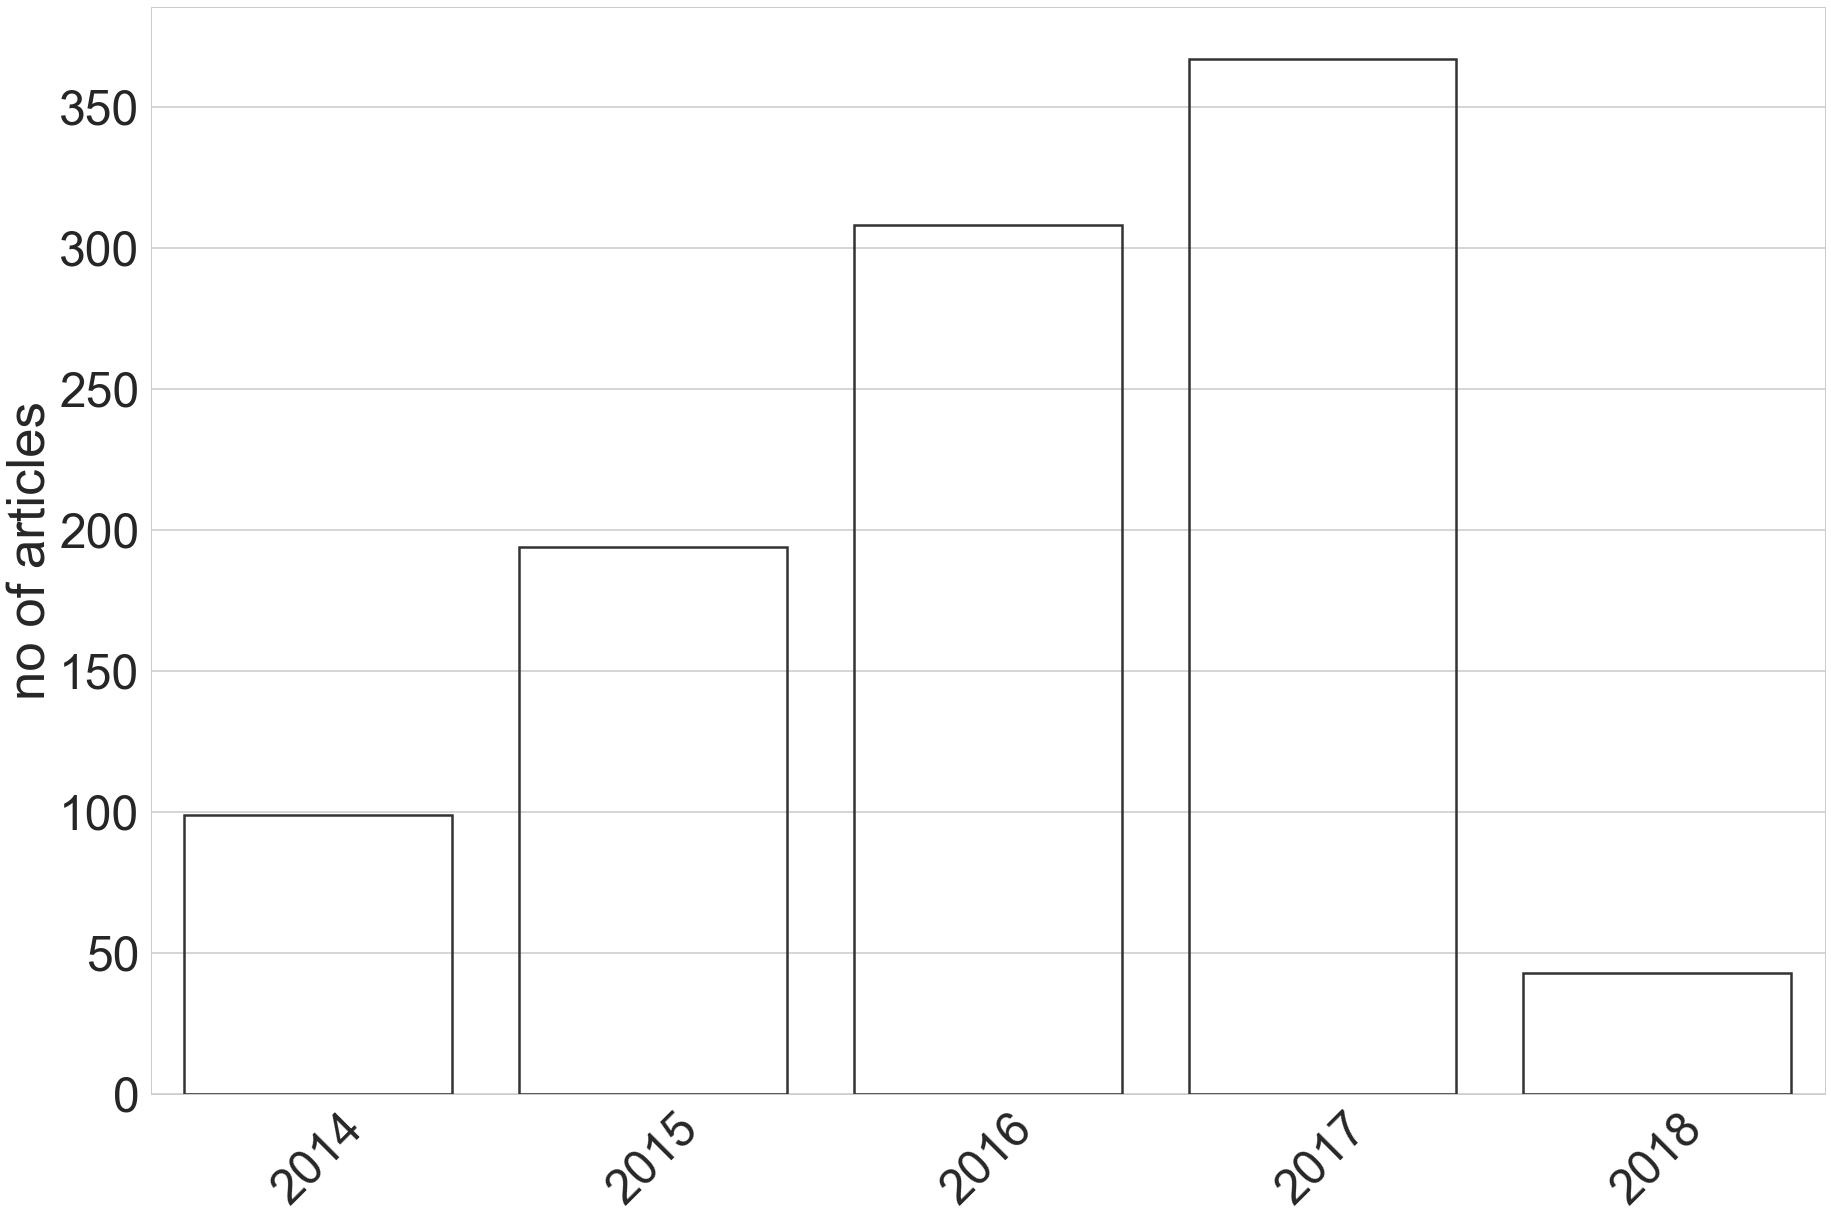

In [24]:
sns.set(rc={'figure.figsize':(30,20)})

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=3)

ax = sns.barplot(x='year', y='category', data=chart, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2")
plt.xticks(rotation=45)
ax.set(xlabel='', ylabel='no of articles')
plt.tight_layout

plt.savefig("./docs/no_articles.png")